# Estudo do Emprego na Regiao de Governo de São José dos Campos, de 2013 a 2017
# Informações segundo SEADE - Portal de Estatística do Estado de São Paulo,
# IMP - Informação dos Municípios Paulistas
# http://www.imp.seade.gov.br/frontend/#/tabelas

In [1]:
import json 
import pandas as pd 
import numpy as np
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')


py.init_notebook_mode(connected=True)


#  Usado uma API para gerar os mapas pelo Plotly 
plotly.tools.set_credentials_file(username='viniciuslelis', api_key='4fyBZGTFoNA2dgAzXsbo')

from pandas.io.json import json_normalize
#package for flattening json in pandas df

# da página <url = 'http://api-imp.seade.gov.br/v1/localidade'>
# salvei um arquivo em JSON <localidade.json>
# existe também um método para ler a URL direta/te, usei em outra tentativa!

with open('localidade.json') as f:
    d = json.load(f)

k=(json_normalize(d['localidades']))

'''
#JSON das localidades:
{
'localidades':
[{
'codigo':,
'nome':,
'nivel':,
'codigo_pai':,
'nome_pai:'
}]
}
'''


"\n#JSON das localidades:\n{\n'localidades':\n[{\n'codigo':,\n'nome':,\n'nivel':,\n'codigo_pai':,\n'nome_pai:'\n}]\n}\n"

# Região Administrativa e Governo de São José dos Campos 

In [2]:
cnt=0
cnt2=0

for caso in k['nome_pai']:
    if caso == 'Região Administrativa de São José dos Campos':
        cnt = cnt + 1
print("SJC c/ Adm", "'contei':", cnt)

for caso in k['nome_pai']:
    if caso == 'Região de Governo de São José dos Campos':
        cnt2 = cnt2 + 1
print("SJC c/ Governo", "'contei':", cnt2, "\n\n")

#https://realpython.com/python-dicts/
print(list(k.keys()),"\n\n")

for caso in k['nome_pai']:
    if caso == 'Região de Governo de São José dos Campos':
        cnt2 = cnt2 + 1

for index, row in k.iterrows():
    if row['nome'] == 'São José dos Campos':
        print(row)

#https://www.tutorialspoint.com/python_pandas/python_pandas_iteration.htm

for index, row in k.iterrows():
    if row['codigo_pai'] == '738':
        print(row)


SJC c/ Adm 'contei': 5
SJC c/ Governo 'contei': 8 


['codigo', 'codigo_pai', 'nivel', 'nome', 'nome_pai'] 


codigo                                             499
codigo_pai                                         738
nivel                                       Municípios
nome                               São José dos Campos
nome_pai      Região de Governo de São José dos Campos
Name: 658, dtype: object
codigo                                              85
codigo_pai                                         738
nivel                                       Municípios
nome                                          Caçapava
nome_pai      Região de Governo de São José dos Campos
Name: 195, dtype: object
codigo                                             202
codigo_pai                                         738
nivel                                       Municípios
nome                                           Igaratá
nome_pai      Região de Governo de São José dos Campos
Name: 331, dtyp

# Interpretando a divisão de municípios abrangidos 


In [3]:
trace = go.Bar(x = ['Região Administrativa de São José dos Campos', 'Região de Governo de São José dos Campos'],
               y = [cnt, cnt2])
data = [trace]
py.iplot(data)

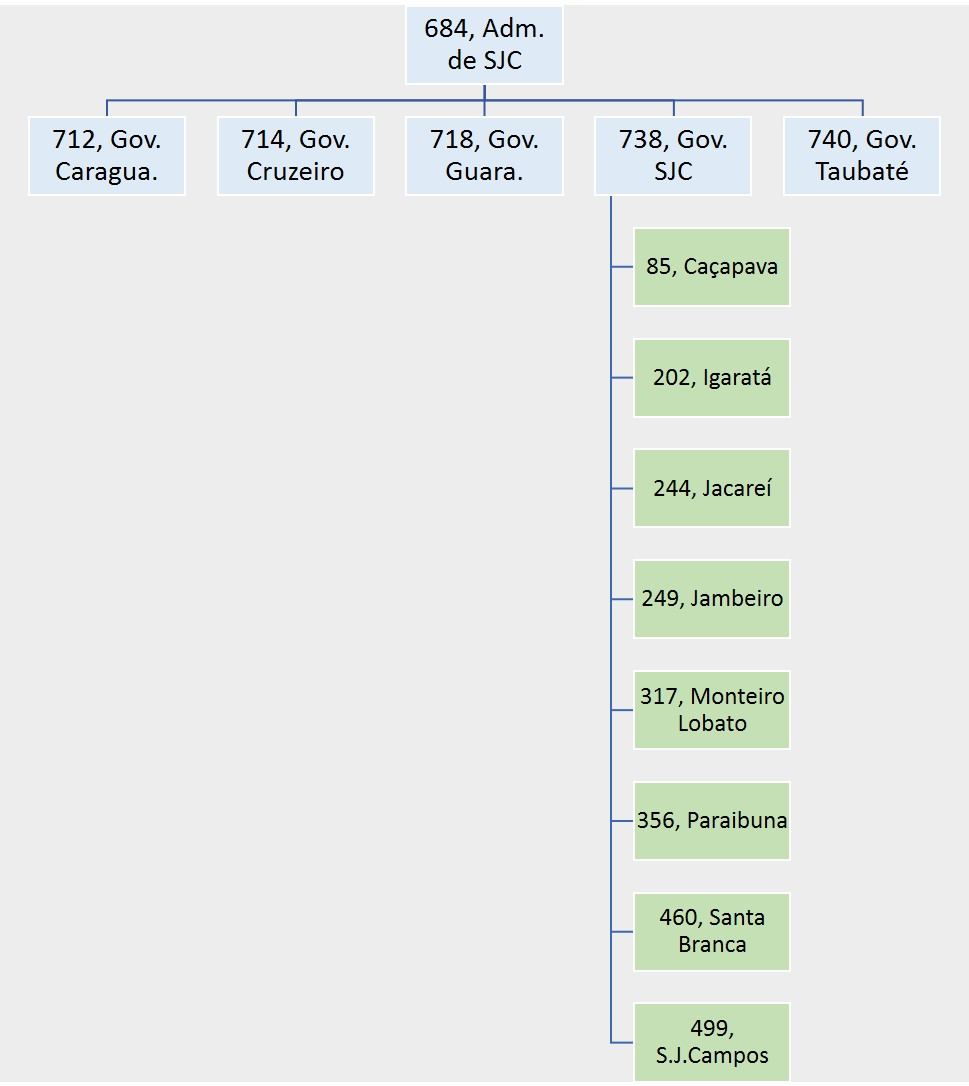

In [4]:
from IPython.display import Image
Image("http://geoeduc.com/indice.jpg")


# As informaçoes de 2013 a 2017 (EM 4 ANOS) dos empregos

In [5]:
df = pd.read_csv('C:/imp_2018-11-25_11-16.csv', sep=';', encoding='latin1')

In [6]:
ultimas = df.columns[-6:]

In [7]:
del df[ultimas[0]]; del df[ultimas[1]]; del df[ultimas[2]]; del df[ultimas[3]]; del df[ultimas[4]]; del df[ultimas[5]]; 

In [8]:
df.columns = ['local', 'periodo', 'formais', 'AgriPecuFlorPescAqui', 'industria', 'construcao', 'AtacoVarejo', 'servicos']

In [9]:
df

,local,periodo,formais,AgriPecuFlorPescAqui,industria,construcao,AtacoVarejo,servicos
0,Caçapava,2013,22263,358,10119,889,3912,6985
1,Caçapava,2014,22628,322,10101,812,4050,7343
2,Caçapava,2015,22011,404,9187,748,4058,7614
3,Caçapava,2016,21149,358,8535,859,4108,7289
4,Caçapava,2017,21272,350,8193,830,4438,7461
5,Igaratá,2013,1532,118,298,209,270,637
6,Igaratá,2014,1522,84,350,139,285,664
7,Igaratá,2015,1687,118,350,161,331,727
8,Igaratá,2016,1560,130,328,95,329,678
9,Igaratá,2017,1646,130,380,69,344,723


# Flutuação de empregos de 2013 a 2017 para o Governo de SJC

In [10]:
empregos2013 = df[df['periodo'] == 2013]
empregos2014 = df[df['periodo'] == 2014]
empregos2015 = df[df['periodo'] == 2015]
empregos2016 = df[df['periodo'] == 2016]
empregos2017 = df[df['periodo'] == 2017]

In [11]:
totalEmpregos2013 = empregos2013['formais']
totalEmpregos2014 = empregos2014['formais']
totalEmpregos2015 = empregos2015['formais']
totalEmpregos2016 = empregos2016['formais']
totalEmpregos2017 = empregos2017['formais']

In [12]:
print("O total de empregos em 2013 é de: ",totalEmpregos2013.sum(), "\n")
print("O total de empregos em 2014 é de: ",totalEmpregos2014.sum(), "\n")
print("O total de empregos em 2015 é de: ",totalEmpregos2015.sum(), "\n")
print("O total de empregos em 2016 é de: ",totalEmpregos2016.sum(), "\n")
print("O total de empregos em 2017 é de: ",totalEmpregos2017.sum(), "\n")

O total de empregos em 2013 é de:  292144 

O total de empregos em 2014 é de:  292351 

O total de empregos em 2015 é de:  282678 

O total de empregos em 2016 é de:  271707 

O total de empregos em 2017 é de:  268498 



In [13]:
trace = go.Bar(x = ['2013', '2014', '2015', '2016', '2017'],
               y = [totalEmpregos2013.sum(), totalEmpregos2014.sum(), totalEmpregos2015.sum(), totalEmpregos2016.sum(), totalEmpregos2017.sum()])
data1 = [trace]
py.iplot(data1)

# Variação percentual ao longo dos anos do Governo de SJC

In [14]:
um = totalEmpregos2013.sum()
dois = totalEmpregos2014.sum()
tres = totalEmpregos2015.sum()
quatro = totalEmpregos2016.sum()
cinco = totalEmpregos2017.sum()
primeiraVarPercent = (dois/um - 1)*100
segundaVarPercent = (tres/dois - 1)*100
terceiraVarPercent = (quatro/tres - 1)*100
quartaVarPercent = (cinco/quatro -1)*100
print("%.2f" %primeiraVarPercent, "%")
print("%.2f" %segundaVarPercent, "%")
print("%.2f" %terceiraVarPercent, "%")
print("%.2f" %quartaVarPercent, "%")


0.07 %
-3.31 %
-3.88 %
-1.18 %


In [15]:
trace = go.Scatter(x = ['2013-2014', '2014-2015', '2015-2016', '2016-2017'],
               y = [primeiraVarPercent, segundaVarPercent, terceiraVarPercent, quartaVarPercent])
data1 = [trace]
py.iplot(data1)

# Variação percentual dos empregos ao longo dos anos nos municípios

In [16]:

def returnMunicipio(municipio):
    municipios = []
    totalEmpregos2013 = df[df['periodo'] == 2013]
    totalEmpregos2014 = df[df['periodo'] == 2014]
    totalEmpregos2015 = df[df['periodo'] == 2015]
    totalEmpregos2016 = df[df['periodo'] == 2016]
    totalEmpregos2017 = df[df['periodo'] == 2017]
    municipio2013 = (totalEmpregos2013[df['local'] == municipio])['formais']
    municipio2014 = (totalEmpregos2014[df['local'] == municipio])['formais']
    municipio2015 = (totalEmpregos2015[df['local'] == municipio])['formais']
    municipio2016 = (totalEmpregos2016[df['local'] == municipio])['formais']
    municipio2017 = (totalEmpregos2017[df['local'] == municipio])['formais']
    municipios.extend([municipio2013.sum(), municipio2014.sum(),municipio2015.sum(),municipio2016.sum(),municipio2017.sum()])
    
    return municipios


cacapava = returnMunicipio("Caçapava")
igarata = returnMunicipio("Igaratá")
jacarei = returnMunicipio("Jacareí")
jambeiro = returnMunicipio("Jambeiro")
monteiro = returnMunicipio("Monteiro Lobato")
paraibuna = returnMunicipio("Paraibuna")
santabranca = returnMunicipio("Santa Branca")
sjc = returnMunicipio("São José dos Campos")


def returnPercent(um, dois, tres, quatro, cinco):
    
#um = a[0] #cacapava2013.sum()
#dois = a[1] #cacapava2014.sum()
#tres = a[2]  #cacapava2015.sum()
#quatro = a[3]  #cacapava2016.sum()
#cinco = a[4]  #cacapava2017.sum()
    percents = []
    umunicipioVarPercent = (dois/um - 1)*100
    dmunicipioVarPercent = (tres/dois - 1)*100
    tmunicipioVarPercent = (quatro/tres - 1)*100
    qmunicipioVarPercent = (cinco/quatro -1)*100
    #print("%.2f" %ucacapavaVarPercent, "%")
    #print("%.2f" %dcacapavaVarPercent, "%")
    #print("%.2f" %tcacapavaVarPercent, "%")
    #print("%.2f" %qcacapavaVarPercent, "%")
    percents.extend([("%.2f" %umunicipioVarPercent), ("%.2f" %dmunicipioVarPercent), ("%.2f" %tmunicipioVarPercent), ("%.2f" %qmunicipioVarPercent)])
    return percents

percentCacapava = returnPercent(cacapava[0], cacapava[1], cacapava[2], cacapava[3], cacapava[4])
percentIgarata = returnPercent(igarata[0], igarata[1], igarata[2], igarata[3], igarata[4])
percentJacarei = returnPercent(jacarei[0], jacarei[1], jacarei[2], jacarei[3], jacarei[4])
percentJambeiro = returnPercent(jambeiro[0], jambeiro[1], jambeiro[2], jambeiro[3], jambeiro[4])
percentMonteiro = returnPercent(monteiro[0], monteiro[1], monteiro[2], monteiro[3], monteiro[4])
percentParaibuna = returnPercent(paraibuna[0], paraibuna[1], paraibuna[2], paraibuna[3], paraibuna[4])
percentSantaBranca = returnPercent(santabranca[0], santabranca[1], santabranca[2], santabranca[3], santabranca[4])
percentSjc = returnPercent(sjc[0], sjc[1], sjc[2], sjc[3], sjc[4])

#print(percentSantaBranca)

Total_governo = go.Scatter(x = ['2013-2014', '2014-2015', '2015-2016', '2016-2017'],
               y = [primeiraVarPercent, segundaVarPercent, terceiraVarPercent, quartaVarPercent],
               name="Total do governo"                         
                          )

Cacapava = go.Scatter(x = ['2013-2014', '2014-2015', '2015-2016', '2016-2017'],
               y = [percentCacapava[0], percentCacapava[1], percentCacapava[2], percentCacapava[3]],
               name="Caçapava"        
                     )
Igarata = go.Scatter(x = ['2013-2014', '2014-2015', '2015-2016', '2016-2017'],
               y = [percentIgarata[0], percentIgarata[1], percentIgarata[2], percentIgarata[3]],
               name="Igarata"        
                     )
Jacarei = go.Scatter(x = ['2013-2014', '2014-2015', '2015-2016', '2016-2017'],
               y = [percentJacarei[0], percentJacarei[1], percentJacarei[2], percentJacarei[3]],
               name="Jacareí"        
                     )
Jambeiro = go.Scatter(x = ['2013-2014', '2014-2015', '2015-2016', '2016-2017'],
               y = [percentJambeiro[0], percentJambeiro[1], percentJambeiro[2], percentJambeiro[3]],
               name="Jambeiro"        
                     )
Monteiro = go.Scatter(x = ['2013-2014', '2014-2015', '2015-2016', '2016-2017'],
               y = [percentMonteiro[0], percentMonteiro[1], percentMonteiro[2], percentMonteiro[3]],
               name="Monteiro Lobato"        
                     )
Paraibuna = go.Scatter(x = ['2013-2014', '2014-2015', '2015-2016', '2016-2017'],
               y = [percentParaibuna[0], percentParaibuna[1], percentParaibuna[2], percentParaibuna[3]],
               name="Paraibuna"        
                     )
SantaBranca = go.Scatter(x = ['2013-2014', '2014-2015', '2015-2016', '2016-2017'],
               y = [percentSantaBranca[0], percentSantaBranca[1], percentSantaBranca[2], percentSantaBranca[3]],
               name="Santa Branca"        
                     )
Sjc = go.Scatter(x = ['2013-2014', '2014-2015', '2015-2016', '2016-2017'],
               y = [percentSjc[0], percentSjc[1], percentSjc[2], percentSjc[3]],
               name="São José dos Campos"        
                     )
data1 = [Total_governo, Cacapava, Igarata, Jacarei, Jambeiro, Monteiro, Paraibuna, SantaBranca, Sjc]
layout = go.Layout(
    xaxis=dict(
        tickmode='linear',
        ticks='outside',
        tick0=0,
        dtick=0.25,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    ),
    yaxis=dict(
        tickmode='linear',
        ticks='outside',
        tick0=0,
        dtick=0.25,
        ticklen=8,
        tickwidth=4,
        tickcolor='#000'
    )
)
fig = go.Figure(data=data1)
py.iplot(fig)